### Goal
To predict customer attrition by analyzing the dataset and using unsupervised and supervised machine learning model, then evaluate each model performance and draw conclusions. 

By applying appropriate feature engineering to each ML model and pick out the best performing model, we can reasonably predict credit card customer attrition on current customers if we use only user dempgraphic features, user spending habits, and other stats, in hope some measure can be done to prevent customers close the account and switch to other banks, or improve marketing to attact new customers. 

### Use Cases
*  Find out existing customers who has high predicted attrition and setup retention campain for them.
*  Find out ways to improve service or update policy to decrease customer attrition rate.
*  Find out the top reasons customers leave.

### Structure of this Project
*  Data Import
   Import the dataset from csv file to pandas dataframe

*  Data Inspection
   Remove unneeded columns from dataframe
   Inspect dataset schema, missing values, unique values count, min/max of each columns etc.

*  EDA
   Use visualization to check label class distribution, feature correlation matrix, create feature sets for ease of feature transformations.

*  Feature Engineering
   Details the feature engineering procedures and also give in-depth analysis of the engineering.  For example, which feature to include, which not to, handling of unknown values, transformation methods.

*  Hyperparameter Tuning
   The following models are chosen for performance comparison.  The optimal hyperparameters are searched for each of the following models.
   *  Unsupervised models:
      *  Non-negative Matrix Factorization
      *  K-means
   *  Supervised models:
      *  k-neighbors
      *  SVM
      *  Logistic Regression
      *  Decision Tree
      *  Extra Tree
      *  Random Forest
      *  Gradient Boosted Decision Tree
      *  Adaboost
      *  XGboost

*  Models Performance Comparison
   Comparing models' performance with the following evaluation metrics:
   accuracy, precision, recall, f1-score, confusion-matrix, auc.
   Conclusion and analysis of the result.

### About the dataset
The dataset I selected comes from Kaggle "Predicting Credit Card Customer Segmentation -- Exploring Key Customer Characteristics".


This dataset contains portfolio information of credit card users from certain bank aimed at predicting customer attrition. The customer portfolio information includes users demographic information such as age, gender, marital status and income category, customers account information such as credit card type, how long the account has been opened, etc, and users' spending pattern information such as total revolving balance, transaction amount and counts etc. 

### Description of Dataset Columns

| Column name | Description |
| ----------- | ----------- |
| CLIENTNUM   | User Id, not needed in this project because dataset will be imported into pandas dataframe and the index is managed by the dataframe      |
| Attrition_Flag   | Flag indicating whether or not the customer has churned out. It is used as label for supervised learning        |
|Customer_Age|Age of customer.|
|Gender|Gender of customer.|
|Dependent_count|Number of dependents that customer has.|
|Education_Level|Education level of customer.|
|Marital_Status|Marital status of customer.|
|Income_Category|Income category of customer.|
|Card_Category|Type of card held by customer.|
|Months_on_book|How long has it been since account opening in month|
|Total_Relationship_Count|such as other checking/saving account with the bank|
|Months_Inactive_12_mon|Number of months customer has been inactive in the last twelve months.|
|Contacts_Count_12_mon|Contacts includes correspondents, branch visits, or phone calls etc|
|Credit_Limit|Credit limit of customer.|
|Total_Revolving_Bal|The balance that carries over from one month to the next is|
|Avg_Open_To_Buy|Average difference between the credit limit assigned to a cardholder account and the present balance on the account.|
|Total_Amt_Chng_Q4_Q1|Total amount changed from quarter 4 to quarter 1.|
|Total_Trans_Amt|Total transaction amount.|
|Total_Trans_Ct|Total transaction count.|
|Total_Ct_Chng_Q4_Q1|Total count changed from quarter 4 to quarter 1.|
|Avg_Utilization_Ratio| the percentage of a borrower’s total available credit that is currently being utilized.|
|Naive_Bayes_Classifier_Attrition_Flag_...|Won't be used since we will build our own classifiers to make predictions.  It will be removed from dataset|

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np 

## Data Import

In [ ]:
# dataset file can be obtained from 
# https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m
DATA_SOURCE = 'BankChurners.csv'
dataset_df = pd.read_csv(DATA_SOURCE)

### Data Inspection

We would like to see how many data entries in each dataset, the schema of the dataset, some sample entries, labels distributions with visualizations, so that we can have ideas how to proceed with data cleaning and transformation in the following.
Before we do the inspection, we will remove CLIENTNUM column because dataframe will manage the data point index for us, and the last two columns too because we will build our own classifier models to make predictions.  Including them would be like using labels as features.

In [ ]:
dataset_df = dataset_df.drop(['CLIENTNUM', 
                             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
                             axis=1)
# save a copy of dataset before feature engineering for comparison afterward
dataset_df_original = dataset_df.copy()
dataset_df.info()
dataset_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
dataset_df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [ ]:
# show some statistics of each column
dataset_df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
# counts of null value in each column
dataset_df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Checking the range of the values in each columns, and all columns are valid.  Ex, age with 26 to 73, no invalid values.

There are no null values in dataframe.

There are no duplicate data points in this dataset.

In [ ]:
dataset_df.min()

Attrition_Flag              Attrited Customer
Customer_Age                               26
Gender                                      F
Dependent_count                             0
Education_Level                       College
Marital_Status                       Divorced
Income_Category                       $120K +
Card_Category                            Blue
Months_on_book                             13
Total_Relationship_Count                    1
Months_Inactive_12_mon                      0
Contacts_Count_12_mon                       0
Credit_Limit                           1438.3
Total_Revolving_Bal                         0
Avg_Open_To_Buy                           3.0
Total_Amt_Chng_Q4_Q1                      0.0
Total_Trans_Amt                           510
Total_Trans_Ct                             10
Total_Ct_Chng_Q4_Q1                       0.0
Avg_Utilization_Ratio                     0.0
dtype: object

In [ ]:
# get counts of Unknown values in each column
dataset_df.isin(["Unknown"]).sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

There are three columns with unknown values, and a lot of them. The total customers are 10127.

Education_Level 1519 15%
Marital_Status  749  7.4%
Income_Category 1112 11%

We will deal with these unknown values in the feature engineering section of this project. 

In [ ]:
dataset_df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

Columns such as Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, their unique values are in hundres and thousands, so they are candidates for numeric variables.

Columns such as Customer_Age and Months_on_book, their unique values are in dozens, and their values are integers, so they are candidates for discretization rather than continuous values.  More details on these in feature engineering section.

## EDA

<Axes: xlabel='Attrition_Flag', ylabel='count'>

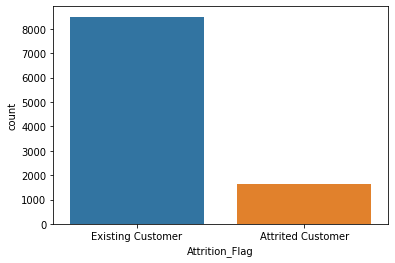

In [ ]:
sns.countplot(x='Attrition_Flag', data=dataset_df)

The ratio between positive class and negative class is about 1:5, so it is not class imbalanced.  Whether classes are imbalanced or not depends on specific problem and there aren't hard boundary between them.  In general under 1:10 ratio may be considered imbalanced.

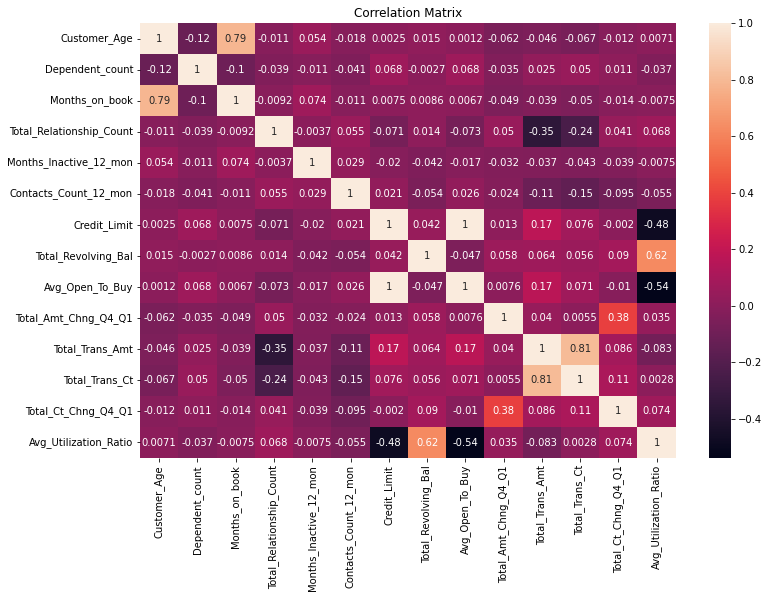

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset_df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

From this correlation matrix chart, we can see the correlation between label and features and among features themselves.

From the first column or first row, we can see there are columns with some correlation with label, such as Total_Revolving_Bal, Total_Trans_Ct.

Also among features themselves, Months_on_book and Customer_Age has very strong possitive correlation, 0.75, where older people might have more stable income or saving, or simple they have enough time to hold the account and their Months_on_book, or account age, is longer.  For certain models such as linear regression that are sensitive to colinearity we may need to remove come features but for this projects this correlation not affect these models.

In [ ]:
dataset_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
dataset_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

I am creating three sets of features, nominal, ordinal, numeric, and others, so that it is convenient to transform them since the transformation depends on the feature type.

First I create a nominal columns set.  a nominal variable is a categorical variable that its values has no logical ordering.  In this project, 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category' belong to this set.

In [ ]:
nominal_cols = ['Gender', 'Education_Level', 'Marital_Status', 
                'Income_Category', 'Card_Category']
nominal_cols_unique_val = {i: list(dataset_df[i].unique()) for i in nominal_cols}
nominal_cols_unique_val

{'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

Create a ordinal columns set.  Ordinal variables has logical ordering.  They are 'Customer_Age', 'Education_Level', 'Income_Category', and 'Card_Category'.  Notice Customer_Age and Months_on_book value type is actually interger, so it is numeric data.  But bucketize it into ordinal will improve model performance since age 45 and 46 won't make much difference so learning numeric is less efficient than categorical data with low cardinality.


In [ ]:
ordinal_cols = ['Dependent_count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Relationship_Count']
ordinal_cols_unique_val = {i: list(dataset_df[i].unique()) for i in ordinal_cols}
ordinal_cols_unique_val

{'Dependent_count': [3, 5, 4, 2, 0, 1],
 'Months_Inactive_12_mon': [1, 4, 2, 3, 6, 0, 5],
 'Contacts_Count_12_mon': [3, 2, 0, 1, 4, 5, 6],
 'Total_Relationship_Count': [5, 6, 4, 3, 2, 1]}

I also create labels_col set, which only contains the label column, Attrition_Flag, for easy removal from X, the training set, and extraction for y, the label or target.

In [ ]:
labels_col = [dataset_df.columns[0]]
labels_col

['Attrition_Flag']

Finally I create numeric_cols to contains columns of continuous values for numeric transformation in feature engineering section.

In [ ]:
numeric_cols = list(
    set(dataset_df.columns)
    - set(nominal_cols)
    - set(ordinal_cols)
    - set(labels_col)
)

In [ ]:
bin_cols = ['Customer_Age', 'Months_on_book']
numeric_cols = set(numeric_cols) - set(bin_cols)
bin_cols

['Customer_Age', 'Months_on_book']

### Feature Engineering

We have to encode categorical variables, as machine learning model can only take numerical values as input.  We have two type categorical variables, nominal and ordinal.  For nominal variables, since it has no natural ordering, and the cardinality is not high (by being high we mean the cardinality is in the order of thousands or more) we can use sklearn's OneHotEncoder. 

There are two ways to perform data transformation on our dataset, one is used the tools provided by pandas dataframe, the other by sklearn's Pipeline and transformer.  Using the latter would be better suited for compatibility and consistance since pipeline and transformer are seamlessly compatible with other sklearn's tool such as GridSearchCV etc.  But performing transformation directly on dataframe is easy to visualize and see the results in each step of the transformation.  Therefore in this project I chose the first one, using pandas dataframe utilities to perform transformation for feature engineering. 

First I would like to process Months_on_book and Customer_Age seperately because from the data inspection we know that their unique values are around dozens and the value type is integer.  So we can convert the features from continuous values to categorial values since the unique count of value is not high and each unique value doesn't make too much difference than the next one and still we won't lose too much useful information from the transformation.  For example, people at age 45 are not so much different than at age 46 in term of spending habit and on deciding to churn or not, so they can be safely put into same age bin.

---



In [ ]:
# dataset_df = pd.get_dummies(dataset_df, columns=nominal_cols + ordinal_cols, drop_first=True)

In [ ]:
# # #bucketize the Months_on_book and Customer_Age columns and then encode the resulting interval values
dataset_df["Months_on_book"] = pd.cut(dataset_df["Months_on_book"], bins=7)
dataset_df["Customer_Age"] = pd.cut(dataset_df["Customer_Age"], bins=7)

# # Print the unique values for the two new columns
print('Unique values for "customer_age_bins":\n', dataset_df["Customer_Age"].unique())
print('\nUnique values for "months_on_book_bins":\n', dataset_df["Months_on_book"].unique())

Unique values for "customer_age_bins":
 [(39.429, 46.143], (46.143, 52.857], (25.953, 32.714], (32.714, 39.429], (59.571, 66.286], (52.857, 59.571], (66.286, 73.0]]
Categories (7, interval[float64, right]): [(25.953, 32.714] < (32.714, 39.429] < (39.429, 46.143] <
                                           (46.143, 52.857] < (52.857, 59.571] < (59.571, 66.286] <
                                           (66.286, 73.0]]

Unique values for "months_on_book_bins":
 [(37.571, 43.714], (43.714, 49.857], (31.429, 37.571], (19.143, 25.286], (25.286, 31.429], (49.857, 56.0], (12.957, 19.143]]
Categories (7, interval[float64, right]): [(12.957, 19.143] < (19.143, 25.286] < (25.286, 31.429] <
                                           (31.429, 37.571] < (37.571, 43.714] < (43.714, 49.857] <
                                           (49.857, 56.0]]


Next I need to handle nominal columns.  I already explained in data inspection section the purples of creating a seperate nominal features set.  It turns out I will process nominal features just like ordinal features and labels, and the reason is as follows:

In theory nominal variables should be treated with one-hot encoding because they are categorial, there is no natural ordering in the categories, and they don't have high cardinality.  But most of the models in this projects that will be tested for performance won't perform well on one-hot encoded features especially the tree level is deep since only fraction of data belongs to any level.  The resulting encoded columns is very sparse and splitting on this column produce little gain.  More training data won't help.
Therefore in this project nominal columns will be treated just like ordinal and label columns by encoding each string value to a integer id.  And it turns out the performance is good and fast.

Of course we need to add 'Months_on_book' and 'Customer_Age' back to ordinal feature set because their values are interval type and also need to be label encoded.

In [ ]:
ordinal_cols = ordinal_cols + ['Months_on_book', 'Customer_Age']

In [ ]:
transform_label = lambda col : \
LabelEncoder().fit_transform(dataset_df[col])

In [ ]:
for col in labels_col + ordinal_cols + nominal_cols:
  dataset_df[col] = transform_label([col])

Now what's left is numeric feature set.  The transformation to be done on it is just normalization so the performance of model is fast.  The normalization can be done on categorial features too here since by now categorial features have already been converted to numeric values.

In [ ]:
transform_normalize = lambda col : \
MinMaxScaler().fit_transform(dataset_df[col])

In [ ]:
for col in list(numeric_cols) + ordinal_cols + nominal_cols:
  dataset_df[col] = transform_normalize([col])

In [ ]:
# if we don't normalize categorical features it won't effect the supervised 
# learning model much but it will kill the unsupervised models' performances

# for col in list(numeric_cols):
#   dataset_df[col] = transform_normalize([col])

In [ ]:
# the following charts plotting code is from the following source:
# https://www.kaggle.com/code/florin22s/bank-customer-attrition-class-balancing

def plot_pie_charts(data, categorical_variables):
    """
    Display pie charts for each categorical variable in the dataset.

    Parameters:
    data (pandas.DataFrame): The input dataset.
    categorical_variables (list): A list of categorical variable column names.

    Returns:
    None
    """
    n_cols = 4  # Maximum number of columns
    n_rows = (
        len(categorical_variables) + n_cols - 1
    ) // n_cols  # Calculate number of rows

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))

    for i, var in enumerate(categorical_variables):
        row, col = i // n_cols, i % n_cols
        counts = data[var].value_counts(normalize=True)

        ax = axes[row, col] if n_rows > 1 else axes[col]  # Get subplot axis
        ax.pie(
            counts,
            labels=counts.index,
            autopct="%1.1f%%",
            pctdistance=0.75,
            wedgeprops={"linewidth": 1.25, "edgecolor": "white"},
        )
        ax.set_title(var, fontsize=12)
    # Remove empty subplots
    for i in range(len(categorical_variables), n_rows * n_cols):
        row, col = i // n_cols, i % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]
        ax.remove()

    plt.show()

def create_histplot_grid(dataframe, numeric_variables, y):
    """
    Create a grid of histograms for numerical columns with respect to y column.

    Parameters:
    dataframe (pandas.DataFrame): Input dataframe.
    numeric_variables (list): List of numerical column names to plot.
    y (str): Categorical column to plot on the y-axis.

    Returns:
    None
    """
    n_cols = 4  # number of columns in the grid
    n_rows = -(-len(numeric_variables) // n_cols)  # round up division
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 3.1 * n_rows))

    for col, ax in zip(numeric_variables, axes.flatten()):
        sns.histplot(data=dataframe, x=col, hue=y, kde=True, element="step", ax=ax)
        ax.set_title(col)
        ax.set_xlabel("")
        ax.set_ylabel("")

    # remove any unused axes
    for i in range(len(numeric_variables), n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

Now the feature engineering is finished and let's double check to see what the categorial features before and after look like

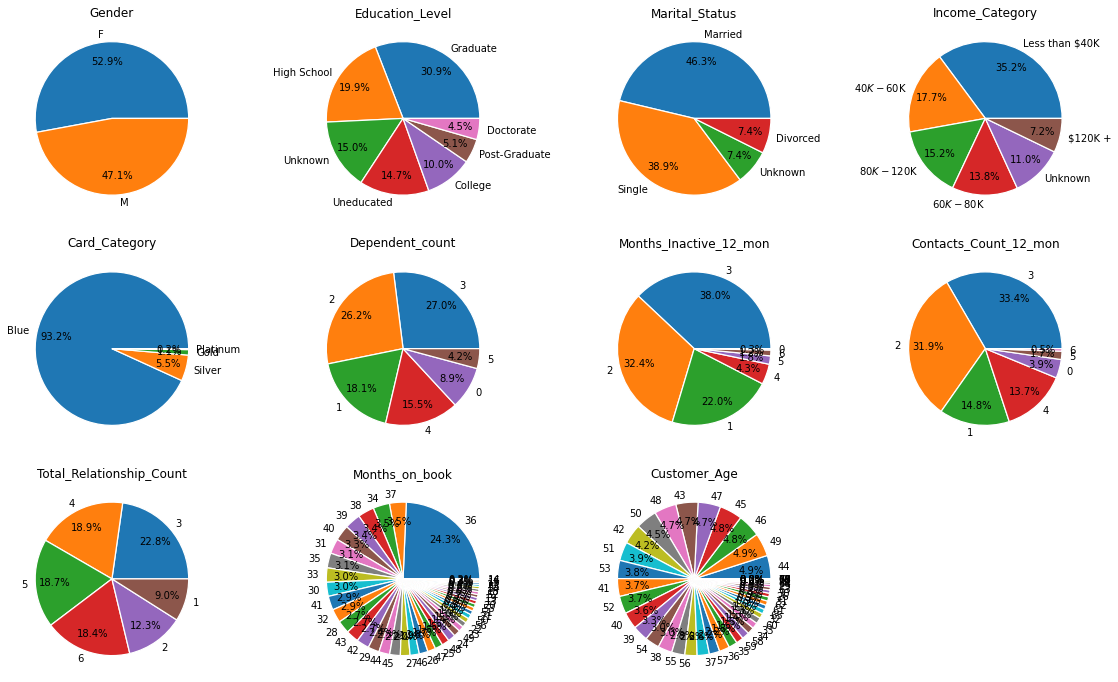

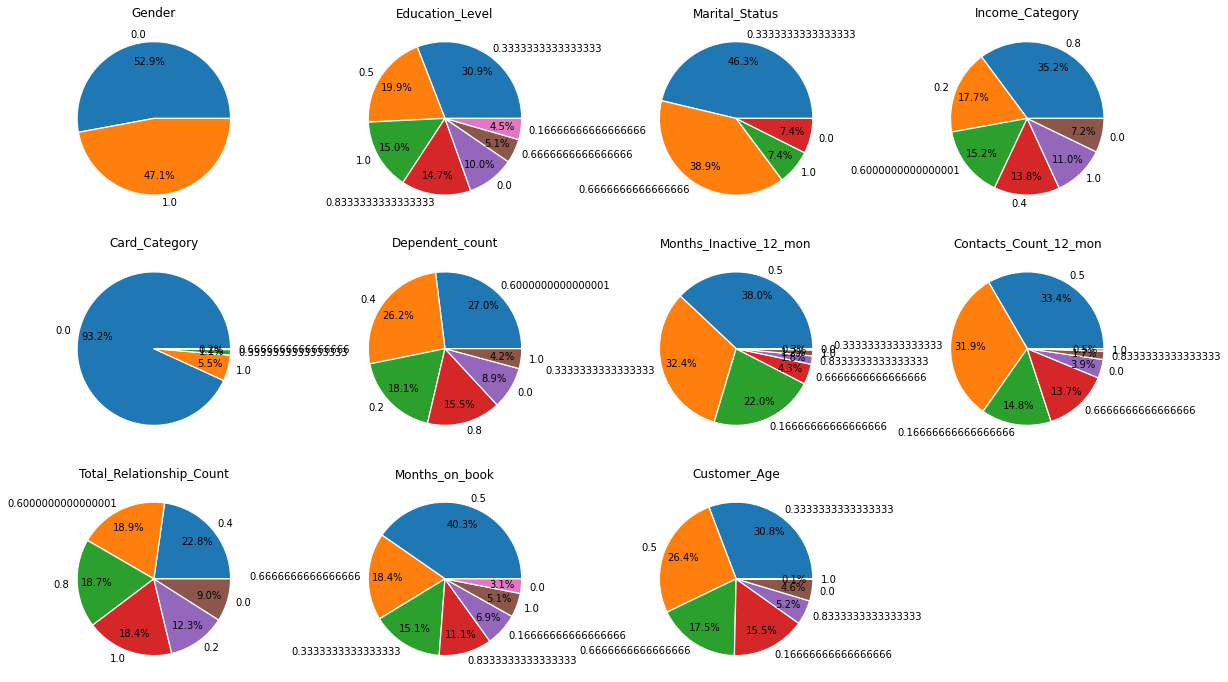

In [ ]:
plot_pie_charts(dataset_df_original, nominal_cols + ordinal_cols)
plot_pie_charts(dataset_df, nominal_cols + ordinal_cols)


As we cans there are no value distribution change between the original dataframe and the transformed dataframe, which is what we expected since the label encoding and normalization shouldn't change the distribution, with the exception of month on book and customer age features because we discretized them.

Now let's check on numeric features before and after feature engineering:

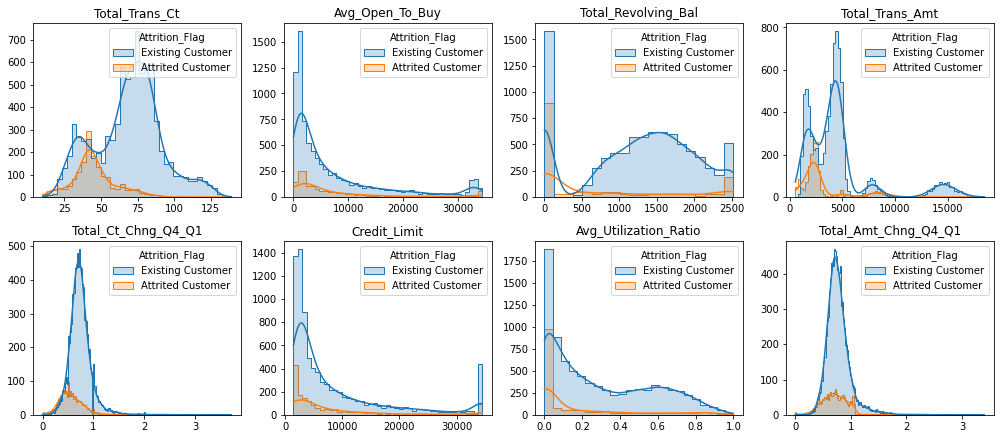

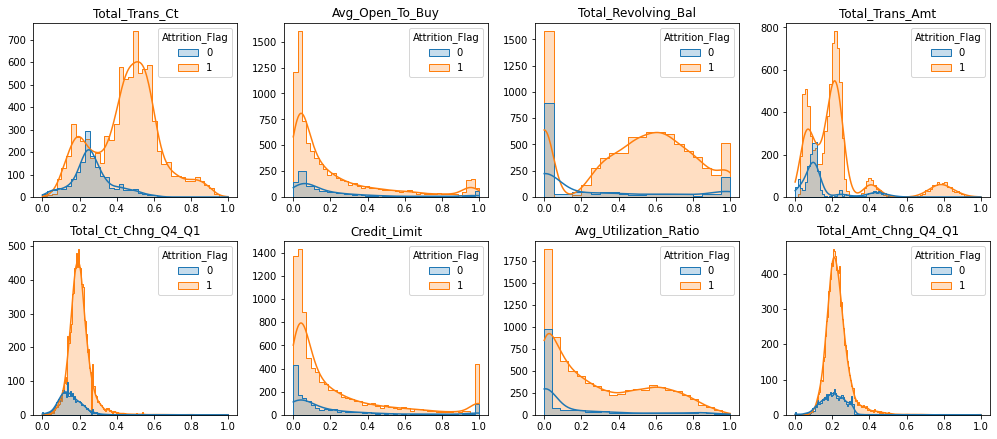

In [ ]:
create_histplot_grid(dataset_df_original, numeric_cols, "Attrition_Flag")
create_histplot_grid(dataset_df, numeric_cols, "Attrition_Flag")

The distribution of the numeric features didn't change and that is what we just expected after the normalization.

In [ ]:
# remove the label column from training input set
X = dataset_df.drop(columns=labels_col).to_numpy()
# put labels in y target/label for supervised learning models
y = dataset_df[labels_col].to_numpy()
y = np.squeeze(y)
# splite 20% of dataset into validation set.
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2
    )

## Hyperparameter Tuning

I use sklearn's GridSearchCV to find the optimal hyperparameters. All the possible values of hyperparameters are put in parameters dictionary and feed it into GridSearchCV.  The searching takes long time to run so after it is finished the code is commented out and the search result is manually saved to save time.

One thing to note is that I didn't use random state parameter for each model therefore the result of optimal hyperparameters may change each time you run the GridSearchCV.

In [ ]:
from sklearn.cluster import KMeans
# parameters = {
#     'n_clusters': (2,), # attrition prediction is binary classifier
#     'init': ('k-means++', 'random'),
#     'algorithm': ('lloyd', 'elkan',),
#     'n_init': ('auto',)
#     }
# # km = Pipeline(
# #     steps=[("preprocessor", preprocessor), ("classifier", KMeans())]
# # )
# km = KMeans()
# clf = GridSearchCV(km, parameters)
# clf.fit(X_train)
# km_params = clf.best_params_
km_params = {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 'auto'}


In [ ]:
from sklearn.svm import SVC
# parameters = {
#     'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
#     'C':[1, 5, 10, 15, 20,],
#     'gamma': ["scale", "auto"],
#     }
# # svm = Pipeline(
# #     steps=[("preprocessor", preprocessor), ("classifier", SVC(**svm_params))]
# # )
# svm = SVC()
# clf = GridSearchCV(svm, parameters)
# clf.fit(X_train, y_train)
# svm_params = clf.best_params_

svm_params = {'C': 5, 'kernel': 'poly'}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# parameters = {
#     'n_neighbors' : [3,5,10,20,40,80,160],
#     'weights' : ['uniform', 'distance'],
#     'leaf_size' : [5, 10, 15, 30, 60,]
#     }
# #clf = KNeighborsClassifier(leaf_size=15, n_jobs=-2, n_neighbors=20)
# kn = KNeighborsClassifier()
# clf = GridSearchCV(kn, parameters)
# clf.fit(X_train, y_train)
# kn_params = clf.best_params_
kn_params = {'leaf_size': 5, 'n_neighbors': 10, 'weights': 'uniform'}

In [ ]:
# parameters = {
#     "penalty": ["l1", "l2", "elasticnet",],
#     "C": [0.2, 0.25, 0.5, 0.75, 1, 2, 100],
#     "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
#     }
# ls = LogisticRegression()
# clf = GridSearchCV(ls, parameters)
# clf.fit(X_train, y_train)
# lr_params = clf.best_params_
lr_params = {'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# parameters = {
#     "max_depth": [50, 100, 150],
#     "min_samples_split": [2, 5],
#     "min_samples_leaf": [1, 2, 4],
#     #'bootstrap': [True, False]
#     }
# dt = DecisionTreeClassifier()
# clf = GridSearchCV(dt, parameters)
# clf.fit(X_train, y_train)
# dt_params = clf.best_params_
dt_params = {'max_depth': 150, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# parameters = {
#     "n_estimators": [50, 100, 150,],
#     "max_depth": [50, 100, 150],
#     "min_samples_split": [2, 5],
#     "min_samples_leaf": [1, 2, 4],
#     #'bootstrap': [True, False]
#     }
# et = ExtraTreesClassifier()
# clf = GridSearchCV(et, parameters)
# clf.fit(X_train, y_train)
# et_params = clf.best_params_
et_params = {'max_depth': 150,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
# parameters = {
#     "n_estimators": [50, 100, 150,],
#     "max_depth": [50, 100, 150],
#     "min_samples_split": [2, 5],
#     "min_samples_leaf": [1, 2, 4],
#     #'bootstrap': [True, False]
#     }
# rf = RandomForestClassifier()
# clf = GridSearchCV(rf, parameters)
# clf.fit(X_train, y_train)
# rf_params = clf.best_params_

rf_params = {'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# parameters = {
#     "n_estimators": [50, 100, 150,],
#     "max_depth": [1, 50, 100, 150],
#     "learning_rate": [0.1, 1, 10],
#     }
# gbdt = GradientBoostingClassifier()
# clf = GridSearchCV(gbdt, parameters)
# clf.fit(X_train, y_train)
# gbdt_params = clf.best_params_
gbdt_params = {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 150}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# parameters = {
#     "n_estimators": [50, 100, 150,],
#     "algorithm": ['SAMME', 'SAMME.R'],
#     "learning_rate": [0.1, 1, 10],
#     }
# adaboost = AdaBoostClassifier()
# clf = GridSearchCV(adaboost, parameters)
# clf.fit(X_train, y_train)
# adaboost_params = clf.best_params_
adaboost_params = {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 150}

In [ ]:
from xgboost import XGBClassifier
import multiprocessing
# xgb_model = XGBClassifier(n_jobs=multiprocessing.cpu_count() // 2)
# clf = GridSearchCV(xgb_model, {'max_depth': [2, 4, 6],
#                                 'n_estimators': [50, 100, 200]}, verbose=1,
#                     n_jobs=2)
# clf.fit(X, y)
# xgb_params = clf.best_params_
# xgb_params
xgb_params = {'max_depth': 2, 'n_estimators': 100}

## Models Performance Comparison

In addition to accuracy, precision, recall, f1-score, confusion-matrix, and auc are also used for models evaluation.  From the data inspection sectioin of this project, we can see the positive and negative class ratio is about 1:5.  This might be imbalanced for some models, especially unsupervised.  Therefore relying on accuracy alone mighbe be misleading.  A classifier merely guessing on majority class can get high accuracy but poorly on precision or recall, and therefore f1-score.  Confusion matrix and auc can give a visualized view on the problem.

In [ ]:
metrics = {}

#### Unsupervised Learning Models

In [ ]:
# sklearn's NMF model cannot be hyperparameter tuned with GridSearchCV.  
# So it is manually tuned and the optimal parameter is the following
from sklearn.decomposition import NMF
nmf_parameters = {
    'n_components': 2,
    'init': 'nndsvda', 
    'solver': 'mu',
    'beta_loss': 'kullback-leibler',
    'l1_ratio': 0.0,
    'alpha_W': 0.30,
    'alpha_H': 'same'
    }
model = NMF(**nmf_parameters)
model.fit(X_train)
W = model.transform(X_test)
y_pred = np.array([np.argmin(x) for x in W])
metrics['nmf'] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, pos_label=1),
            "recall": recall_score(y_test, y_pred, pos_label=1),
            "f1": f1_score(y_test, y_pred, pos_label=1),
            "confusion_matrix": confusion_matrix(y_test, y_pred),
            "auc": roc_auc_score(y_test, y_pred),          
        }

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(**km_params)
model.fit(X_train)
y_pred = model.predict(X_test)
metrics['km'] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, pos_label=1),
            "recall": recall_score(y_test, y_pred, pos_label=1),
            "f1": f1_score(y_test, y_pred, pos_label=1),
            "confusion_matrix": confusion_matrix(y_test, y_pred),
            "auc": roc_auc_score(y_test, y_pred),          
        }

#### Supervised Learning Models

In [ ]:
model = KNeighborsClassifier(**kn_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics['kn'] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, pos_label=1),
            "recall": recall_score(y_test, y_pred, pos_label=1),
            "f1": f1_score(y_test, y_pred, pos_label=1),
            "confusion_matrix": confusion_matrix(y_test, y_pred),
            "auc": roc_auc_score(y_test, y_pred),            
        }

In [ ]:
svm_params = {'C': 5, 'kernel': 'poly'}
model = SVC(**svm_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics['svm'] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, pos_label=1),
            "recall": recall_score(y_test, y_pred, pos_label=1),
            "f1": f1_score(y_test, y_pred, pos_label=1),
            "confusion_matrix": confusion_matrix(y_test, y_pred),
            "auc": roc_auc_score(y_test, y_pred),            
        }

In [ ]:
model = LogisticRegression(**lr_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics['lr'] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, pos_label=1),
            "recall": recall_score(y_test, y_pred, pos_label=1),
            "f1": f1_score(y_test, y_pred, pos_label=1),
            "confusion_matrix": confusion_matrix(y_test, y_pred),
            "auc": roc_auc_score(y_test, y_pred),            
        }

In [ ]:
model = DecisionTreeClassifier(**dt_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics['dt'] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, pos_label=1),
            "recall": recall_score(y_test, y_pred, pos_label=1),
            "f1": f1_score(y_test, y_pred, pos_label=1),
            "confusion_matrix": confusion_matrix(y_test, y_pred),
            "auc": roc_auc_score(y_test, y_pred),           
        }

In [ ]:
model = ExtraTreesClassifier(**et_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics['et'] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, pos_label=1),
            "recall": recall_score(y_test, y_pred, pos_label=1),
            "f1": f1_score(y_test, y_pred, pos_label=1),
            "confusion_matrix": confusion_matrix(y_test, y_pred),
            "auc": roc_auc_score(y_test, y_pred),           
        }

In [ ]:
model = RandomForestClassifier(**rf_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics['rf'] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, pos_label=1),
            "recall": recall_score(y_test, y_pred, pos_label=1),
            "f1": f1_score(y_test, y_pred, pos_label=1),
            "confusion_matrix": confusion_matrix(y_test, y_pred),
            "auc": roc_auc_score(y_test, y_pred),           
        }

In [ ]:
model = GradientBoostingClassifier(**gbdt_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics['gbdt'] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, pos_label=1),
            "recall": recall_score(y_test, y_pred, pos_label=1),
            "f1": f1_score(y_test, y_pred, pos_label=1),
            "confusion_matrix": confusion_matrix(y_test, y_pred),
            "auc": roc_auc_score(y_test, y_pred),           
        }

In [ ]:
model = AdaBoostClassifier(**adaboost_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics['adaboost'] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, pos_label=1),
            "recall": recall_score(y_test, y_pred, pos_label=1),
            "f1": f1_score(y_test, y_pred, pos_label=1),
            "confusion_matrix": confusion_matrix(y_test, y_pred),
            "auc": roc_auc_score(y_test, y_pred),           
        }

In [ ]:
xgb_model = XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
metrics['xgb'] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, pos_label=1),
            "recall": recall_score(y_test, y_pred, pos_label=1),
            "f1": f1_score(y_test, y_pred, pos_label=1),
            "confusion_matrix": confusion_matrix(y_test, y_pred),
            "auc": roc_auc_score(y_test, y_pred),           
        }

In [ ]:
pd.DataFrame(metrics).transpose()

,accuracy,precision,recall,f1,confusion_matrix,auc
nmf,0.657947,0.851748,0.716892,0.778523,"[[115, 212], [481, 1218]]",0.534287
km,0.495558,0.850052,0.483814,0.616654,"[[182, 145], [877, 822]]",0.520194
kn,0.898322,0.909041,0.976457,0.941544,"[[161, 166], [40, 1659]]",0.734406
svm,0.929911,0.947671,0.969982,0.958697,"[[236, 91], [51, 1648]]",0.845847
lr,0.908687,0.923378,0.971748,0.946946,"[[190, 137], [48, 1651]]",0.776394
dt,0.936821,0.961245,0.963508,0.962375,"[[261, 66], [62, 1637]]",0.880837
et,0.943238,0.948471,0.985874,0.966811,"[[236, 91], [24, 1675]]",0.853793
rf,0.962488,0.969346,0.986463,0.97783,"[[274, 53], [23, 1676]]",0.912192
gbdt,0.960513,0.973115,0.979988,0.97654,"[[281, 46], [34, 1665]]",0.919658
adaboost,0.9615,0.973147,0.981165,0.97714,"[[281, 46], [32, 1667]]",0.920246


### Conclusion
Overall, supervised learning models perform better than unsupervised learning model, at least for this dataset. Some of the fancy version of tree-based model for supervised learning such as XGboost can achieve f1-score of 0.9882 versus 0.7785 for non-negative matrix factorization and 0.6166 for k-means.

Unsupervised learning models are also more susceptible to class imbalance than supervised models. As we can see from the data inspection section the positive and negative class ratio is about 1:5, and we can see from the result that for example XGboost (xgb) model yielded 0.9713 accuracy and 0.9830 f1-score that supervised learning is not affected much by imbalanced class.  But as for non-negative matrix factorization model (nmf) especially k-means the effect is big, 0.4955 accuracy versus 0.8500 precision, which high precision means low false positive rate, and the recall is only 0.4838, which means high false negative rate.  It is also obvious if we look at the confusion matrix for k-means.  To fix the class imbalance problem for unsupervised learning models, there are several techniques we can use such as negative sampling etc but we skip it in this project.


So what we can conclude from this observation is that label really helps and we will try all we can to obtain labeled dataset.  Only in the situation where label cannot be available, we can use unsupervised learning but with more careful feature engineering such as class imbalance problem.

## Reference

https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m
https://branyang.gitbooks.io/tfdocs/content/tutorials/wide_and_deep.html

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features